# Read simulation files and plot SNR vs $C_{sky}$

### Jun 09, 2020

## Code

In [1]:
import sys
sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm

Welcome to JupyROOT 6.18/04


In [2]:
file_list=[]#Define an empty list
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/allCuts/data/"):#Loop over desired directory
    if filename.endswith(".root"): #extension, .root in this case
        file_list.append(os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/allCuts/data/", str(filename))) #add file name to the list

In [3]:
chain = TChain("allCuts") #Define chain and tree that needs to be read. "allCuts" in this case.
for line in file_list:
    chain.AddFile(line)

In [4]:
corr_val = []
snr_val = []
failsRcut = []
this_y_val = []
weight = []
energy = []
for entry in chain:
#     if(entry.peakCorr_single[0]<0.01): continue
#     if(entry.peakPhi_single[0]<0):
#         phi.append(entry.peakPhi_single[0]+180) #extract variables of interest
#     else:
    corr_val.append(entry.corr_val[0]) 
    snr_val.append(entry.snr_val[0]) 
    failsRcut.append(entry.failsRcut[0])
    this_y_val.append(entry.this_y_val[0])
    weight.append(entry.weight)
    energy.append(entry.energy)

## Plots

#### SNR vs $C_{sky}$

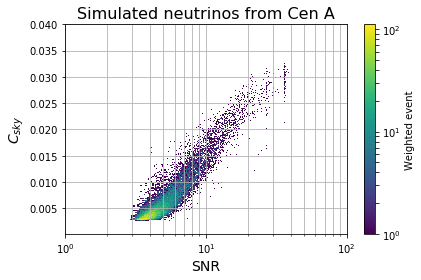

In [5]:
plt.figure(figsize=(6,4))
plt.hist2d(snr_val,corr_val, bins=420, weights=weight,norm=LogNorm());
plt.colorbar(label="Weighted event" )
plt.xlabel("SNR", fontsize=14)
plt.ylabel("$C_{sky}$", fontsize=14)
plt.xscale('log')
# plt.xscale('log')

plt.xlim(1,100)
plt.ylim(1e-4,0.04)
plt.grid()
plt.grid(which='minor', axis='both')
plt.title("Simulated neutrinos from Cen A", fontsize=16)
plt.tight_layout()
# plt.savefig("CenA_bivariateCutPlot.png", dpi=200)

Seems plausible, I was expecting $C_sky$ to be higher. Let's check the energy distribution

(1000000000000000.0, 1e+20)

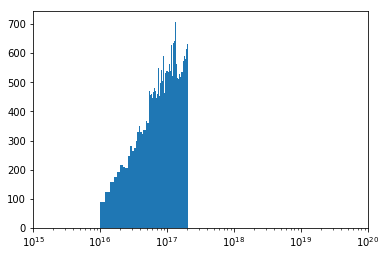

In [6]:
plt.hist(energy, bins=100);
plt.xscale('log')
# plt.yscale('log')
plt.xlim(1E15, 1E20)


Oh, there seems to be the error. Somehow there are not triggered events with energies higher than $\sim 10^{17}$

### Other comments

I modified the flux file so AraSim correctly reads it. Simulations should be in the queue.